# 0.0 Overview plots

In [1]:

""" 
IMPORTS
"""
import os
import autograd.numpy as np
import pickle
import seaborn as sns
from collections import defaultdict
import pandas as pd
from matplotlib import colors as mcolors
from one.api import ONE
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer

# Get my functions
functions_path =  '/home/ines/repositories/representation_learning_variability/Models/Sub-trial//2_fit_models/'
# functions_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability//Models/Sub-trial//2_fit_models/'
os.chdir(functions_path)
from preprocessing_functions import concatenate_sessions, fix_discontinuities
functions_path =  '/home/ines/repositories/representation_learning_variability/Models/Sub-trial//3_postprocess_results/'
# functions_path = '/Users/ineslaranjeira/Documents/Repositories/representation_learning_variability//Models/Sub-trial//2_fit_models/'
os.chdir(functions_path)
from postprocessing_functions import remove_states_str, state_identifiability
from plotting_functions import plot_states_aligned, align_bin_design_matrix, states_per_trial_phase, plot_states_aligned_trial, traces_over_sates, traces_over_few_sates

# one = ONE(base_url='https://alyx.internationalbrainlab.org')
one = ONE(mode='remote')

## Parameters

In [2]:
bin_size = 0.1
# bin_size = 0.02

# Plotting params
multiplier = 1/bin_size

event_type_list = ['goCueTrigger_times']  # , 'feedback_times', 'firstMovement_times'
event_type_name = ['Go cue']  # , 'Feedback time', 'First movement onset'

num_train_batches = 5
threshold = 0.01
# threshold = 0

# Values for grid search (should get this from results)
last_lag = 20
lag_step = 2
start_lag = 1
Lags = list(range(start_lag, last_lag, lag_step))
kappas = [0, 1, 5, 10, 100, 500, 1000, 2000, 5000, 7000, 10000]



## Get data

In [3]:
# Load preprocessed data
prepro_results_path =  '/home/ines/repositories/representation_learning_variability/DATA/Sub-trial/Results/90_trials/' + str(bin_size) + '/'
os.chdir(prepro_results_path)
idxs, mouse_names, matrix_all, matrix_all_unnorm, session_all = pickle.load(open(prepro_results_path + "preprocessed_data_v4_170724", "rb"))
collapsed_matrices, collapsed_unnorm, collapsed_trials = concatenate_sessions (mouse_names, matrix_all, matrix_all_unnorm, session_all)

## Plot combined states per animal

In [4]:
use_sets = [['avg_wheel_vel'], ['Lick count'], ['whisker_me'],
            ['left_X', 'left_Y', 'right_X', 'right_Y'], ['nose_X', 'nose_Y']]
use_sets = [['avg_wheel_vel'], ['Lick count'], ['whisker_me'],
            ['left_X', 'left_Y', 'right_X', 'right_Y']]
use_sets = [['avg_wheel_vel'], ['Lick count'], ['whisker_me']]

var_interest_map = ['avg_wheel_vel', 'Lick count', 'whisker_me', 'left_X', 'nose_X']

idx_init_list = [0, 1, 2, 3, 7]
idx_end_list = [1, 2, 3, 7, 9]

## Plot overview

In [6]:
exclude_sessions = ['f1db6257-85ef-4385-b415-2d078ec75df2',
'259927fd-7563-4b03-bc5d-17b4d0fa7a55',
'e49d8ee7-24b9-416a-9d04-9be33b655f40',
'6f6d2c8e-28be-49f4-ae4d-06be2d3148c1',
'193fe7a8-4eb5-4f3e-815a-0c45864ddd77',
'f8d5c8b0-b931-4151-b86c-c471e2e80e5d',
'ebc9392c-1ecb-4b4b-a545-4e3d70d23611',
'537677fe-1e24-4755-948c-fa4a4e8ecce5',
'a4747ac8-6a75-444f-b99b-696fff0243fd',
'7be8fec4-406b-4e74-8548-d2885dcc3d5e',
'a71175be-d1fd-47a3-aa93-b830ea3634a1',
'53738f95-bd08-4d9d-9133-483fdb19e8da',
'd901aff5-2250-467a-b4a1-0cb9729df9e2',
'7939711b-8b4d-4251-b698-b97c1eaa846e',
'510b1a50-825d-44ce-86f6-9678f5396e02',
'aad23144-0e52-4eac-80c5-c4ee2decb198',
'd839491f-55d8-4cbe-a298-7839208ba12b',
'72cb5550-43b4-4ef0-add5-e4adfdfb5e02']

/tmp/ipykernel_9404/3473655286.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unnorm_mat['Bin'] = matrix_all_unnorm[mouse_name][session]['Bin']
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['prev_choice'][1:] = trials['choice'][:-1]
/home/ines/repositories/representation_learning_variability/Functions/one_functions_generic.py:532: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the document

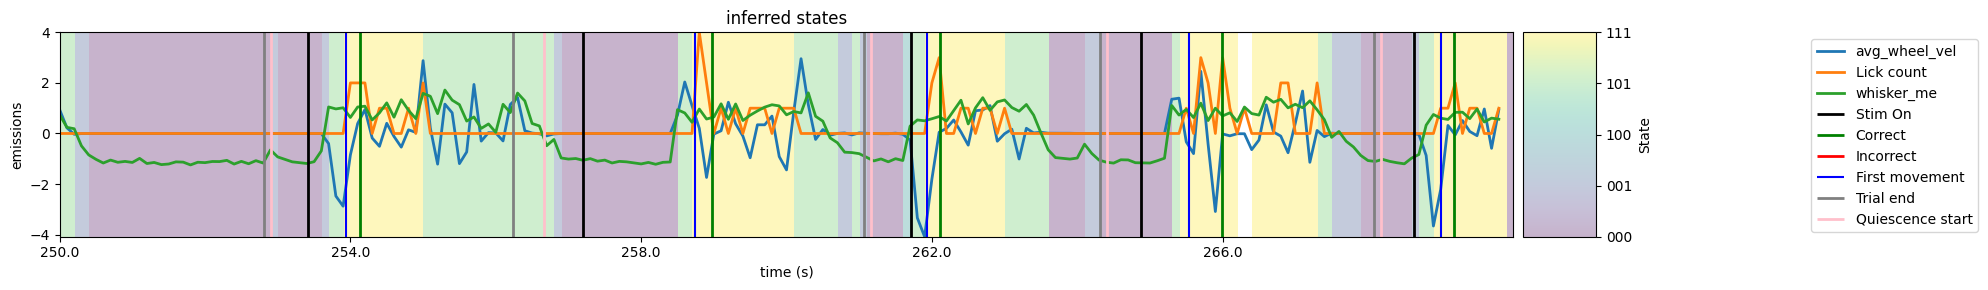

In [7]:
var_names = ['avg_wheel_vel', 'Lick count', 'whisker_me', 'left_X', 'left_Y', 'right_X', 'right_Y']
var_names = ['avg_wheel_vel', 'Lick count', 'whisker_me']

for m, mat in enumerate(idxs[0:1]):
    if len(mat) > 35: 
        
        mouse_name = mat[37:]
        session = mat[0:36]
        mouse_name = 'ZM_3003'
        session = '934dd7a4-fbdc-459c-8830-04fe9033bc28'
        
        if session not in exclude_sessions:
            # print('session is ' +session)

            # Get mouse data
            session_trials = session_all[mouse_name][session].reset_index()
            design_matrix = matrix_all[mouse_name][session][:,0:3]
            unnorm_mat = matrix_all_unnorm[mouse_name][session][var_names]
            unnorm_mat['Bin'] = matrix_all_unnorm[mouse_name][session]['Bin']

            # Get states per variable and concatenate
            num_states = 2
            states_path =  '/home/ines/repositories/representation_learning_variability/DATA/Sub-trial/Results/90_trials/' + str(bin_size) + '/'+str(num_states)+'_states/most_likely_states/'
            os.chdir(states_path)

            c_states = []
            for s, set in enumerate(use_sets):
                
                most_likely_states, _ = pickle.load(open("most_likely_states" + set[0] + '_' + mouse_name + session, "rb"))
                # Save
                if len(c_states) == 0:
                    c_states = most_likely_states
                else:
                    c_states = np.vstack((c_states, most_likely_states))      
            
            combined_states = remove_states_str(c_states.T, threshold)
            
            " Prepare data "
            num_timesteps = np.shape(design_matrix)[0]
            design_matrix_heading = pd.DataFrame(columns=var_names)
            design_matrix_heading[var_names] = design_matrix[0:len(combined_states)]  # TODO: need to understand why number is the same and whether it depends on lag
            bins = unnorm_mat[:(num_timesteps // num_train_batches) * num_train_batches]['Bin']
            design_matrix_heading['Bin'] = bins
            design_matrix_heading['Lick count'] = unnorm_mat[:(num_timesteps // num_train_batches) * num_train_batches]['Lick count']
            
            # Transform states into identifiable states
            identifiable_states = state_identifiability(combined_states, design_matrix_heading, use_sets)
            
            # Change states back to integer
            state_labels = np.unique(identifiable_states)
            int_state = np.arange(0, len(state_labels), 1).astype(float)
            if state_labels[-1] == 'nan':
                int_state[-1] = np.nan
            # Define the mapping as a dictionary
            mapping = {unique: key for unique, key in zip(state_labels, int_state)}
            inverted_mapping = {v: k for k, v in mapping.items()}

            # Use np.vectorize to apply the mapping
            replace_func = np.vectorize(mapping.get)
            new_states = replace_func(identifiable_states)
            num_states = len(np.unique(new_states))

            # Align bins
            init = -1 * multiplier
            end = 1.5 * multiplier
            empirical_data = align_bin_design_matrix(init, end, event_type_list, session_trials, design_matrix_heading, new_states, multiplier)
            empirical_data['identifiable_states'] = identifiable_states
            states_trial = states_per_trial_phase(empirical_data, session_trials, multiplier)
            
            # """ Stack trial states """
            # trial_init = 10  # First trial to plot
            # trials_to_plot = 20  # How many trials to plot (if very different will compromise readibility)
            # plot_states_aligned_trial(trial_init, empirical_data, session_trials, bin_size, trials_to_plot, inverted_mapping)

            # " Plot states stacked and aligned per trial type "
            # plot_states_aligned(init, end, empirical_data, event_type_name, bin_size, inverted_mapping)
            
            # """ Plot states per trial epoch """
            # colors = sns.color_palette("viridis", num_states)
            # # states_trial = states_per_trial_phase(empirical_data, session_trials, multiplier)
            # states_trial = states_per_trial_phase(empirical_data, session_trials, multiplier)
            # sns.histplot(x='label', hue='most_likely_states', data=states_trial, stat = 'percent',
            #                     multiple="stack", legend=True, palette='viridis', alpha=0.3)
            # # plt.figure(figsize=[7, 5])
            # plt.xticks(rotation=45)
            # plt.tight_layout()
            # plt.title(mouse_name)
            # plt.show()
        
            """ Plot raw traces over states """
            init = int(np.min(empirical_data['Bin'])/10+10) * multiplier # First bin
            init = 250*multiplier
            inter = 10 * multiplier
            inter = 20 * multiplier
            traces_over_few_sates(init, inter, empirical_data, session_trials, var_names, multiplier, inverted_mapping)
            
        else:
            print(session)


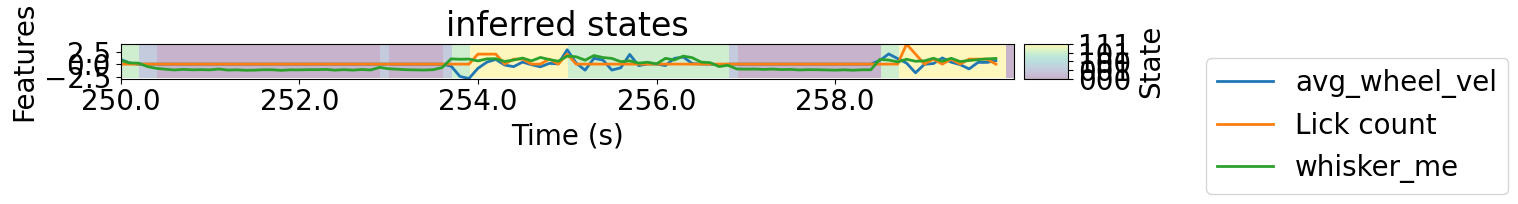

In [11]:
    # def traces_over_few_sates (init, inter, design_matrix, session_trials, columns_to_standardize, multiplier, inverted_mapping):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    design_matrix = empirical_data.copy()
    session_trials = session_trials.copy()
    columns_to_standardize = var_names.copy()
    plt.rcParams.update({'font.size': 20})
    inter = 10*multiplier
    # Compute the most likely states
    
    end = init + inter

    fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(16, 2))

    df_normalized = design_matrix
    df_normalized['Bin'] = design_matrix['Bin']
    
    use_normalized = df_normalized.loc[(df_normalized['Bin']>init) & (df_normalized['Bin']<end)]
    
    # To make sure color code is used correctly
    number_of_states = len(use_normalized['most_likely_states'].unique()) - np.sum(np.isnan(use_normalized['most_likely_states'].unique()))
    states_to_append = np.arange(0, number_of_states, 1)
    
    # Plot original values
    if len(columns_to_standardize) == 2:
        axs.plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[0]], label=columns_to_standardize[0], linewidth=2)
        axs.plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[1]], label=columns_to_standardize[1], linewidth=2)
        plot_max = np.max([use_normalized[columns_to_standardize[0]], 
                           use_normalized[columns_to_standardize[1]]])
        plot_min = np.min([use_normalized[columns_to_standardize[0]], 
                           use_normalized[columns_to_standardize[1]]])
    elif len(columns_to_standardize) == 1:
        use_index0 = ~np.isnan(use_normalized[columns_to_standardize[0]])
        use_time = np.arange(0, len(use_index0), 1)  # NOTE! If there are NaNs, x axis label will have the time wrong # NOTE!!
        # axs.plot(use_normalized['Bin'][use_index0]-init, use_normalized[columns_to_standardize[0]][use_index0], label=columns_to_standardize[0], linewidth=2)
        axs.plot(use_time, use_normalized[columns_to_standardize[0]][use_index0], label=columns_to_standardize[0], linewidth=2)
        plot_max = np.max(use_normalized[columns_to_standardize[0]])
        plot_min = np.min(use_normalized[columns_to_standardize[0]])
    elif len(columns_to_standardize) == 3:
        use_index0 = ~np.isnan(use_normalized[columns_to_standardize[0]])
        use_time0 = np.arange(0, len(use_index0), 1)  # NOTE! If there are NaNs, x axis label will have the time wrong # NOTE!!
        use_index1 = ~np.isnan(use_normalized[columns_to_standardize[1]])
        use_time1 = np.arange(0, len(use_index1), 1)  # NOTE! If there are NaNs, x axis label will have the time wrong # NOTE!!
        use_index2 = ~np.isnan(use_normalized[columns_to_standardize[2]])
        use_time2 = np.arange(0, len(use_index2), 1)  # NOTE! If there are NaNs, x axis label will have the time wrong # NOTE!!

        axs.plot(use_time0, use_normalized[columns_to_standardize[0]], label=columns_to_standardize[0], linewidth=2)
        axs.plot(use_time1, use_normalized[columns_to_standardize[1]], label=columns_to_standardize[1], linewidth=2)
        axs.plot(use_time2, use_normalized[columns_to_standardize[2]], label=columns_to_standardize[2], linewidth=2)
        
        # axs.plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[0]], label=columns_to_standardize[0], linewidth=2)
        # axs.plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[1]], label=columns_to_standardize[1], linewidth=2)
        # axs.plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[2]], label=columns_to_standardize[2], linewidth=2)
        plot_max = np.max([use_normalized[columns_to_standardize[0]], 
                           use_normalized[columns_to_standardize[1]],
                           use_normalized[columns_to_standardize[2]]])
        plot_min = np.min([use_normalized[columns_to_standardize[0]], 
                           use_normalized[columns_to_standardize[1]],
                           use_normalized[columns_to_standardize[2]]])
    elif len(columns_to_standardize) == 7:
        axs.plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[0]], label=columns_to_standardize[0], linewidth=2)
        axs.plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[1]], label=columns_to_standardize[1], linewidth=2)
        axs.plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[2]], label=columns_to_standardize[2], linewidth=2)
        axs.plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[3]], label=columns_to_standardize[3], linewidth=2)
        axs.plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[4]], label=columns_to_standardize[4], linewidth=2)
        axs.plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[5]], label=columns_to_standardize[5], linewidth=2)
        axs.plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[6]], label=columns_to_standardize[6], linewidth=2)
        plot_max = np.max([use_normalized[columns_to_standardize[0]], 
                           use_normalized[columns_to_standardize[1]],
                           use_normalized[columns_to_standardize[2]],
                           use_normalized[columns_to_standardize[3]],
                           use_normalized[columns_to_standardize[4]],
                           use_normalized[columns_to_standardize[5]],
                           use_normalized[columns_to_standardize[6]]])
        plot_min = np.min([use_normalized[columns_to_standardize[0]], 
                           use_normalized[columns_to_standardize[1]],
                           use_normalized[columns_to_standardize[2]],
                           use_normalized[columns_to_standardize[3]],
                           use_normalized[columns_to_standardize[4]],
                           use_normalized[columns_to_standardize[5]],
                           use_normalized[columns_to_standardize[6]]])
    cax = axs.imshow(np.concatenate([use_normalized['most_likely_states'], states_to_append])[None,:], 
            extent=(0, len(np.concatenate([use_normalized['most_likely_states'], states_to_append])), plot_min, plot_max),
            aspect="auto",
            cmap='viridis',
            alpha=0.3) 

    divider = make_axes_locatable(axs)
    cax_colorbar = divider.append_axes("right", size="5%", pad=0.1)
    cbar = fig.colorbar(cax, cax=cax_colorbar, ax=axs)

    cbar.set_label('State')
    if len(inverted_mapping) > 0:
        # Set the ticks and labels based on the dictionary
        cbar.set_ticks(list(inverted_mapping.keys()))
        cbar.set_ticklabels(list(inverted_mapping.values()))

    # axs.hlines(0, init, end, color='Black', linestyles='dashed', linewidth=2)
    # axs.vlines(np.array(session_trials['goCueTrigger_times'] * 1*multiplier)-init, plot_min, plot_max, label='Stim On', 
    #            color='Black', linewidth=2)
    # axs.vlines(np.array(session_trials.loc[session_trials['feedbackType']==1, 'feedback_times'] * 1*multiplier)-init, 
    #            plot_min, plot_max, label='Correct', color='Green', linewidth=2)
    # axs.vlines(np.array(session_trials.loc[session_trials['feedbackType']==-1, 'feedback_times'] * 1*multiplier)-init, 
    #            plot_min, plot_max, label='Incorrect', color='Red', linewidth=2)
    # axs.vlines(np.array(session_trials['firstMovement_times'] * 1*multiplier)-init, plot_min, plot_max, label='First movement', color='Blue')
    # axs.vlines(np.array(session_trials['intervals_0'] * 1*multiplier)-init, plot_min, plot_max, label='Trial end', color='Grey', linewidth=2)
    # axs.vlines(np.array((session_trials['goCueTrigger_times'] - session_trials['quiescencePeriod']) * 1*multiplier)-init, 
    #            plot_min, plot_max, label='Quiescence start', color='Pink', linewidth=2)

    axs.set_ylim(plot_min, plot_max)
    axs.set_ylabel("Features")
    axs.set_xlabel("Time (s)")
    axs.set_xlim(0, end-init)
    axs.set_xticks(np.arange(0, inter, inter/5),np.arange(init/multiplier, 
                                                          end/multiplier, (inter/multiplier)/5))
    axs.set_title("inferred states")
    axs.legend(loc='upper left', bbox_to_anchor=(1.2, 1))
    file_path = os.path.join('/home/ines/repositories/representation_learning_variability/Exported figures/COSYNE25/')
    plt.savefig(file_path+'all_timeseries.svg', format="svg")

    plt.tight_layout()
    plt.show()

In [103]:
unique_states = np.unique(combined_states)
new_states = unique_states.copy()

# Create new mapping depending on empirical data for each state
for v, var in enumerate(use_sets):
    zeros = [s[v] == '0' if s != 'nan' else False for s in combined_states]
    ones = [s[v] == '1' if s != 'nan' else False for s in combined_states]
    if var == ['avg_wheel_vel']:
        var_0 = np.array(np.abs(design_matrix_heading[var]))[zeros]
        var_1 = np.array(np.abs(design_matrix_heading[var]))[ones]
    elif var == ['left_X', 'left_Y', 'right_X', 'right_Y']:
        var_0 = np.array(np.abs(np.diff(design_matrix_heading[var], axis=0)))[zeros[1:]]
        var_1 = np.array(np.abs(np.diff(design_matrix_heading[var], axis=0)))[ones[1:]]
    elif var == ['nose_x', 'nose_Y']:
        print('Not implemented yet')
    else:
        var_0 = np.array(design_matrix_heading[var])[zeros]
        var_1 = np.array(design_matrix_heading[var])[ones]
    
    if np.nanmean(var_0)> np.nanmean(var_1):
        var_state_0 = [s[v] == '0' if s != 'nan' else False for s in unique_states]
        new_states[var_state_0] = np.array([s[:v] + '1' + s[v+1:] for s in new_states[var_state_0]])
        var_state_1 = [s[v] == '1' if s != 'nan' else False for s in unique_states]
        new_states[var_state_1] = np.array([s[:v] + '0' + s[v+1:] for s in new_states[var_state_1]])


identifiable_mapping = {unique: key for unique, key in zip(unique_states, new_states)}

# Use np.vectorize to apply the mapping
replace_func = np.vectorize(identifiable_mapping.get)
identifiable_states = replace_func(combined_states)

In [108]:
def state_identifiability(combined_states, design_matrix_heading, use_sets):
    
    unique_states = np.unique(combined_states)
    new_states = unique_states.copy()

    # Create new mapping depending on empirical data for each state
    for v, var in enumerate(use_sets):
        zeros = [s[v] == '0' if s != 'nan' else False for s in combined_states]
        ones = [s[v] == '1' if s != 'nan' else False for s in combined_states]
        if var == ['avg_wheel_vel']:
            var_0 = np.array(np.abs(design_matrix_heading[var]))[zeros]
            var_1 = np.array(np.abs(design_matrix_heading[var]))[ones]
        elif var == ['left_X', 'left_Y', 'right_X', 'right_Y']:
            var_0 = np.array(np.abs(np.diff(design_matrix_heading[var], axis=0)))[zeros[1:]]
            var_1 = np.array(np.abs(np.diff(design_matrix_heading[var], axis=0)))[ones[1:]]
        elif var == ['nose_x', 'nose_Y']:
            print('Not implemented yet')
        else:
            var_0 = np.array(design_matrix_heading[var])[zeros]
            var_1 = np.array(design_matrix_heading[var])[ones]
        
        if np.nanmean(var_0)> np.nanmean(var_1):
            var_state_0 = [s[v] == '0' if s != 'nan' else False for s in unique_states]
            new_states[var_state_0] = np.array([s[:v] + '1' + s[v+1:] for s in new_states[var_state_0]])
            var_state_1 = [s[v] == '1' if s != 'nan' else False for s in unique_states]
            new_states[var_state_1] = np.array([s[:v] + '0' + s[v+1:] for s in new_states[var_state_1]])


    identifiable_mapping = {unique: key for unique, key in zip(unique_states, new_states)}

    # Use np.vectorize to apply the mapping
    replace_func = np.vectorize(identifiable_mapping.get)
    identifiable_states = replace_func(combined_states)
    
    return identifiable_states

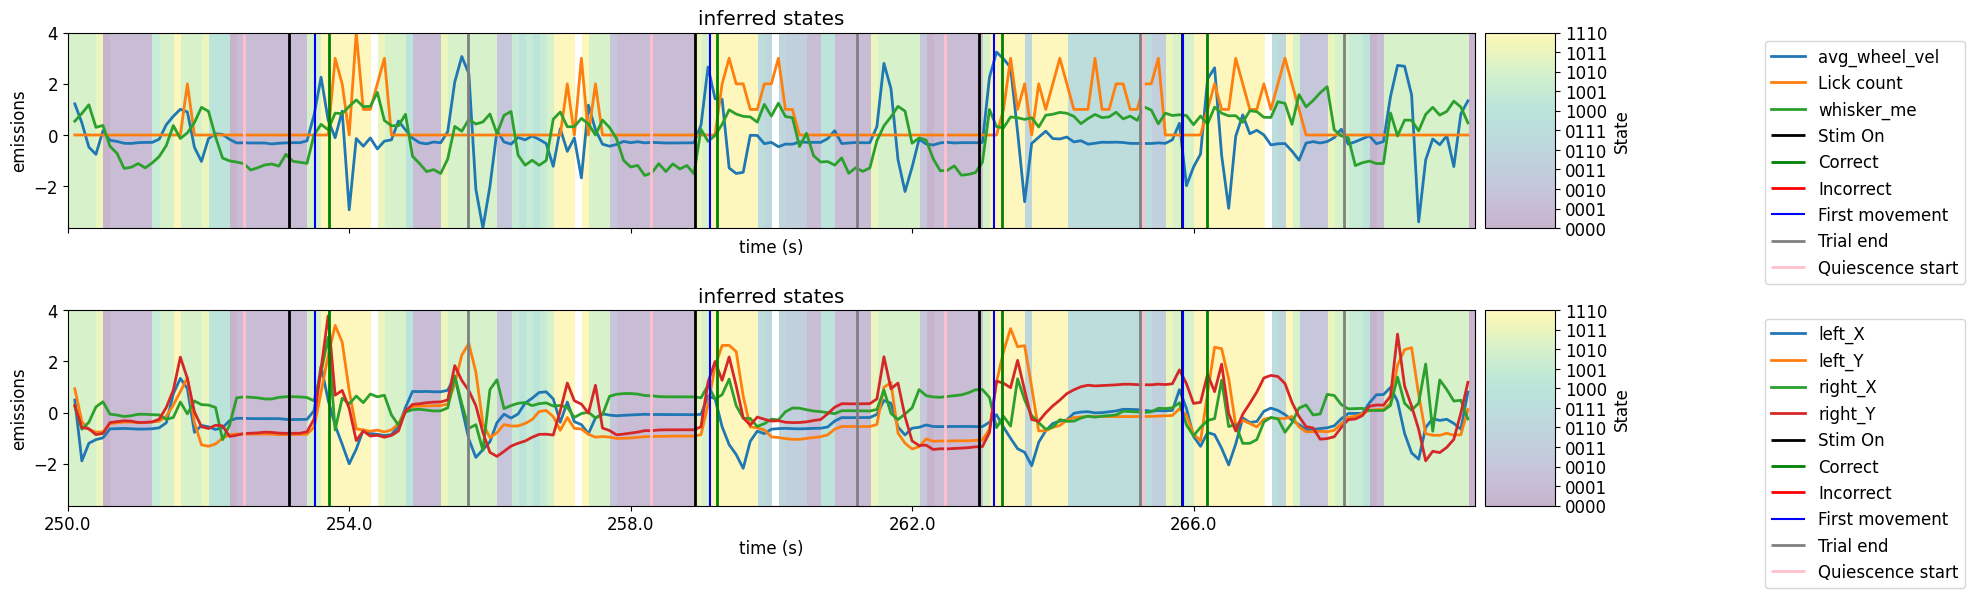

In [27]:
            """ Plot raw traces over states """
            init = int(np.min(empirical_data['Bin'])/10+10) * multiplier # First bin
            init = 250*multiplier
            inter = 10 * multiplier
            inter = 20 * multiplier
            traces_over_few_sates(init, inter, empirical_data, session_trials, var_names, multiplier, inverted_mapping)

In [26]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def traces_over_few_sates (init, inter, design_matrix, session_trials, columns_to_standardize, multiplier, inverted_mapping):
    # Compute the most likely states
    
    end = init + inter
    df_normalized = design_matrix
    df_normalized['Bin'] = design_matrix['Bin']
    
    use_normalized = df_normalized.loc[(df_normalized['Bin']>init) & (df_normalized['Bin']<end)]
    
    # To make sure color code is used correctly
    number_of_states = len(use_normalized['most_likely_states'].unique()) - np.sum(np.isnan(use_normalized['most_likely_states'].unique()))
    states_to_append = np.arange(0, number_of_states, 1)

    if len(columns_to_standardize) == 7:
        fig, axs = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(20, 6))
        
        axs[0].plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[0]], label=columns_to_standardize[0], linewidth=2)
        axs[0].plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[1]], label=columns_to_standardize[1], linewidth=2)
        axs[0].plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[2]], label=columns_to_standardize[2], linewidth=2)
        axs[1].plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[3]], label=columns_to_standardize[3], linewidth=2)
        axs[1].plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[4]], label=columns_to_standardize[4], linewidth=2)
        axs[1].plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[5]], label=columns_to_standardize[5], linewidth=2)
        axs[1].plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[6]], label=columns_to_standardize[6], linewidth=2)
        plot_max = np.max([use_normalized[columns_to_standardize[0]], 
                        use_normalized[columns_to_standardize[1]],
                        use_normalized[columns_to_standardize[2]],
                        use_normalized[columns_to_standardize[3]],
                        use_normalized[columns_to_standardize[4]],
                        use_normalized[columns_to_standardize[5]],
                        use_normalized[columns_to_standardize[6]]])
        plot_min = np.min([use_normalized[columns_to_standardize[0]], 
                        use_normalized[columns_to_standardize[1]],
                        use_normalized[columns_to_standardize[2]],
                        use_normalized[columns_to_standardize[3]],
                        use_normalized[columns_to_standardize[4]],
                        use_normalized[columns_to_standardize[5]],
                        use_normalized[columns_to_standardize[6]]])
        cax = axs[0].imshow(np.concatenate([use_normalized['most_likely_states'], states_to_append])[None,:], 
                extent=(0, len(np.concatenate([use_normalized['most_likely_states'], states_to_append])), plot_min, plot_max),
                aspect="auto",
                cmap='viridis',
                alpha=0.3) 
        cax = axs[1].imshow(np.concatenate([use_normalized['most_likely_states'], states_to_append])[None,:], 
                extent=(0, len(np.concatenate([use_normalized['most_likely_states'], states_to_append])), plot_min, plot_max),
                aspect="auto",
                cmap='viridis',
                alpha=0.3) 
        
        
        divider = make_axes_locatable(axs[0])
        cax_colorbar = divider.append_axes("right", size="5%", pad=0.1)
        cbar = fig.colorbar(cax, cax=cax_colorbar, ax=axs[0])

        cbar.set_label('State')
        if len(inverted_mapping) > 0:
            # Set the ticks and labels based on the dictionary
            cbar.set_ticks(list(inverted_mapping.keys()))
            cbar.set_ticklabels(list(inverted_mapping.values()))


        divider = make_axes_locatable(axs[1])
        cax_colorbar = divider.append_axes("right", size="5%", pad=0.1)
        cbar = fig.colorbar(cax, cax=cax_colorbar, ax=axs[1])

        cbar.set_label('State')
        if len(inverted_mapping) > 0:
            # Set the ticks and labels based on the dictionary
            cbar.set_ticks(list(inverted_mapping.keys()))
            cbar.set_ticklabels(list(inverted_mapping.values()))

        axs[0].hlines(0, init, end, color='Black', linestyles='dashed', linewidth=2)
        axs[0].vlines(np.array(session_trials['goCueTrigger_times'] * 1*multiplier)-init, plot_min, plot_max, label='Stim On', 
                color='Black', linewidth=2)
        axs[0].vlines(np.array(session_trials.loc[session_trials['feedbackType']==1, 'feedback_times'] * 1*multiplier)-init, 
                plot_min, plot_max, label='Correct', color='Green', linewidth=2)
        axs[0].vlines(np.array(session_trials.loc[session_trials['feedbackType']==-1, 'feedback_times'] * 1*multiplier)-init, 
                plot_min, plot_max, label='Incorrect', color='Red', linewidth=2)
        axs[0].vlines(np.array(session_trials['firstMovement_times'] * 1*multiplier)-init, plot_min, plot_max, label='First movement', color='Blue')
        axs[0].vlines(np.array(session_trials['intervals_0'] * 1*multiplier)-init, plot_min, plot_max, label='Trial end', color='Grey', linewidth=2)
        axs[0].vlines(np.array((session_trials['goCueTrigger_times'] - session_trials['quiescencePeriod']) * 1*multiplier)-init, 
                plot_min, plot_max, label='Quiescence start', color='Pink', linewidth=2)

        axs[0].set_ylim(plot_min, plot_max)
        axs[0].set_ylabel("emissions")
        axs[0].set_xlabel("time (s)")
        axs[0].set_xlim(0, end-init)
        axs[0].set_xticks(np.arange(0, inter, inter/5),np.arange(init/multiplier, 
                                                            end/multiplier, (inter/multiplier)/5))
        axs[0].set_title("inferred states")
        axs[0].legend(loc='upper left', bbox_to_anchor=(1.2, 1))


        axs[1].hlines(0, init, end, color='Black', linestyles='dashed', linewidth=2)
        axs[1].vlines(np.array(session_trials['goCueTrigger_times'] * 1*multiplier)-init, plot_min, plot_max, label='Stim On', 
                color='Black', linewidth=2)
        axs[1].vlines(np.array(session_trials.loc[session_trials['feedbackType']==1, 'feedback_times'] * 1*multiplier)-init, 
                plot_min, plot_max, label='Correct', color='Green', linewidth=2)
        axs[1].vlines(np.array(session_trials.loc[session_trials['feedbackType']==-1, 'feedback_times'] * 1*multiplier)-init, 
                plot_min, plot_max, label='Incorrect', color='Red', linewidth=2)
        axs[1].vlines(np.array(session_trials['firstMovement_times'] * 1*multiplier)-init, plot_min, plot_max, label='First movement', color='Blue')
        axs[1].vlines(np.array(session_trials['intervals_0'] * 1*multiplier)-init, plot_min, plot_max, label='Trial end', color='Grey', linewidth=2)
        axs[1].vlines(np.array((session_trials['goCueTrigger_times'] - session_trials['quiescencePeriod']) * 1*multiplier)-init, 
                plot_min, plot_max, label='Quiescence start', color='Pink', linewidth=2)

        axs[1].set_ylim(plot_min, plot_max)
        axs[1].set_ylabel("emissions")
        axs[1].set_xlabel("time (s)")
        axs[1].set_xlim(0, end-init)
        axs[1].set_xticks(np.arange(0, inter, inter/5),np.arange(init/multiplier, 
                                                            end/multiplier, (inter/multiplier)/5))
        axs[1].set_title("inferred states")
        axs[1].legend(loc='upper left', bbox_to_anchor=(1.2, 1))
        plt.tight_layout()
        plt.show()
    
    else:
        fig, axs = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(20, 3))
        
        # Plot original values
        if len(columns_to_standardize) == 2:
            axs.plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[0]], label=columns_to_standardize[0], linewidth=2)
            axs.plot(use_normalized['Bin']-init, use_normalized[columns_to_standardize[1]], label=columns_to_standardize[1], linewidth=2)
            plot_max = np.max([use_normalized[columns_to_standardize[0]], 
                            use_normalized[columns_to_standardize[1]]])
            plot_min = np.min([use_normalized[columns_to_standardize[0]], 
                            use_normalized[columns_to_standardize[1]]])
        elif len(columns_to_standardize) == 1:
            use_index0 = ~np.isnan(use_normalized[columns_to_standardize[0]])
            use_time = np.arange(0, len(use_index0), 1)  # NOTE! If there are NaNs, x axis label will have the time wrong # NOTE!!
            # axs.plot(use_normalized['Bin'][use_index0]-init, use_normalized[columns_to_standardize[0]][use_index0], label=columns_to_standardize[0], linewidth=2)
            axs.plot(use_time, use_normalized[columns_to_standardize[0]][use_index0], label=columns_to_standardize[0], linewidth=2)
            plot_max = np.max(use_normalized[columns_to_standardize[0]])
            plot_min = np.min(use_normalized[columns_to_standardize[0]])
        elif len(columns_to_standardize) == 3:
            use_index0 = ~np.isnan(use_normalized[columns_to_standardize[0]])
            use_time0 = np.arange(0, len(use_index0), 1)  # NOTE! If there are NaNs, x axis label will have the time wrong # NOTE!!
            use_index1 = ~np.isnan(use_normalized[columns_to_standardize[1]])
            use_time1 = np.arange(0, len(use_index1), 1)  # NOTE! If there are NaNs, x axis label will have the time wrong # NOTE!!
            use_index2 = ~np.isnan(use_normalized[columns_to_standardize[2]])
            use_time2 = np.arange(0, len(use_index2), 1)  # NOTE! If there are NaNs, x axis label will have the time wrong # NOTE!!

            axs.plot(use_time0, use_normalized[columns_to_standardize[0]], label=columns_to_standardize[0], linewidth=2)
            axs.plot(use_time1, use_normalized[columns_to_standardize[1]], label=columns_to_standardize[1], linewidth=2)
            axs.plot(use_time2, use_normalized[columns_to_standardize[2]], label=columns_to_standardize[2], linewidth=2)

            plot_max = np.max([use_normalized[columns_to_standardize[0]], 
                            use_normalized[columns_to_standardize[1]],
                            use_normalized[columns_to_standardize[2]]])
            plot_min = np.min([use_normalized[columns_to_standardize[0]], 
                            use_normalized[columns_to_standardize[1]],
                            use_normalized[columns_to_standardize[2]]])
            

        cax = axs.imshow(np.concatenate([use_normalized['most_likely_states'], states_to_append])[None,:], 
                extent=(0, len(np.concatenate([use_normalized['most_likely_states'], states_to_append])), plot_min, plot_max),
                aspect="auto",
                cmap='viridis',
                alpha=0.3) 

        divider = make_axes_locatable(axs)
        cax_colorbar = divider.append_axes("right", size="5%", pad=0.1)
        cbar = fig.colorbar(cax, cax=cax_colorbar, ax=axs)

        cbar.set_label('State')
        if len(inverted_mapping) > 0:
            # Set the ticks and labels based on the dictionary
            cbar.set_ticks(list(inverted_mapping.keys()))
            cbar.set_ticklabels(list(inverted_mapping.values()))

        axs.hlines(0, init, end, color='Black', linestyles='dashed', linewidth=2)
        axs.vlines(np.array(session_trials['goCueTrigger_times'] * 1*multiplier)-init, plot_min, plot_max, label='Stim On', 
                color='Black', linewidth=2)
        axs.vlines(np.array(session_trials.loc[session_trials['feedbackType']==1, 'feedback_times'] * 1*multiplier)-init, 
                plot_min, plot_max, label='Correct', color='Green', linewidth=2)
        axs.vlines(np.array(session_trials.loc[session_trials['feedbackType']==-1, 'feedback_times'] * 1*multiplier)-init, 
                plot_min, plot_max, label='Incorrect', color='Red', linewidth=2)
        axs.vlines(np.array(session_trials['firstMovement_times'] * 1*multiplier)-init, plot_min, plot_max, label='First movement', color='Blue')
        axs.vlines(np.array(session_trials['intervals_0'] * 1*multiplier)-init, plot_min, plot_max, label='Trial end', color='Grey', linewidth=2)
        axs.vlines(np.array((session_trials['goCueTrigger_times'] - session_trials['quiescencePeriod']) * 1*multiplier)-init, 
                plot_min, plot_max, label='Quiescence start', color='Pink', linewidth=2)

        axs.set_ylim(plot_min, plot_max)
        axs.set_ylabel("emissions")
        axs.set_xlabel("time (s)")
        axs.set_xlim(0, end-init)
        axs.set_xticks(np.arange(0, inter, inter/5),np.arange(init/multiplier, 
                                                            end/multiplier, (inter/multiplier)/5))
        axs.set_title("inferred states")
        axs.legend(loc='upper left', bbox_to_anchor=(1.2, 1))

        plt.tight_layout()
        plt.show()
    